# A deep learning of Deep Learning
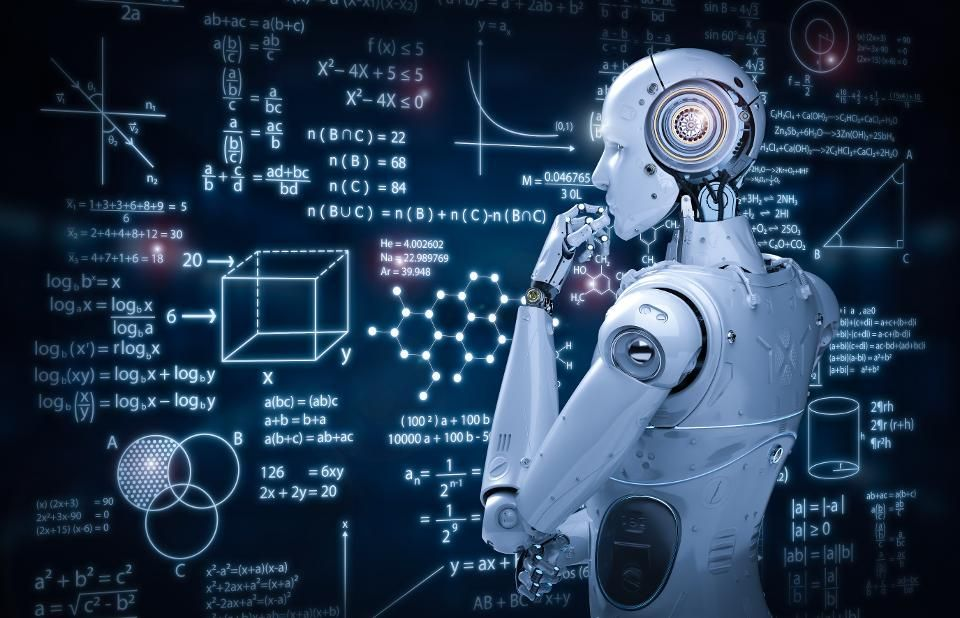
*Pic Credits: Getty*

**Deep Learning (DL)** is progressing by leaps and bounds at a phenomenally fast pace with so much new research, papers, ideas, models being developed throughout the world. The last few years have seen a lot of solutions being built using deep learning methods and frameworks and this is expected to only increase in the future.

This notebook analyses the deep learning practitioners from the [2019 Kaggle ML & DS Survey](https://www.kaggle.com/c/kaggle-survey-2019) to understand patterns, get insights, learn challenges and maybe even answer some questions regarding the current and future landscape of deep learning:

* Who are these deep learning practitioners? Are they concentrated in a certain geography or age or background?
* Are deep learning practitioners very different from other machine learning practitioners? Do they have a different career path or have different salaries?
* Does deep learning require a lot of money and resources? Are the tools, products and languages used very different requiring special skills?
* What does the future of deep learning hold for us? Will it significantly change industries or even modeling and solutioning methods?   

...and many more.

**P.S.**: The insights shared in this notebook are based on the 2019 Kaggle Survey data only and not all of them necessarily would be similar in the real world.

# Setup
We will be using the [2019 Kaggle ML & DS Survey data](https://www.kaggle.com/c/kaggle-survey-2019/data). Since there is no direct question to flag a person as a DL practitioner or not, we will be using responses to *Q24: Which of the following ML algorithms do you use on a regular basis?* with options:
- Linear or Logistic Regression
- Decision Trees or Random Forests
- Gradient Boosting Machines (xgboost, lightgbm, etc)
- Bayesian Approaches
- Evolutionary Approaches
- **Dense Neural Networks (MLPs, etc)**
- **Convolutional Neural Networks**
- **Generative Adversarial Networks**
- **Recurrent Neural Networks**
- **Transformer Networks (BERT, gpt-2, etc)**

A DL practitioner is tagged as someone who has selected at least one of the last 5 options. This will be the subset of data used the most.   
A non-DL practitioner is tagged as someone who has selected at least one of the first 5 options and not selected any of the last 5 options.   

There are some who have not answered this question or have answered **None** or have answered **Other**. Since there is no concrete information about them to classify correctly, we will be eliminating them for the purpose of this analysis.

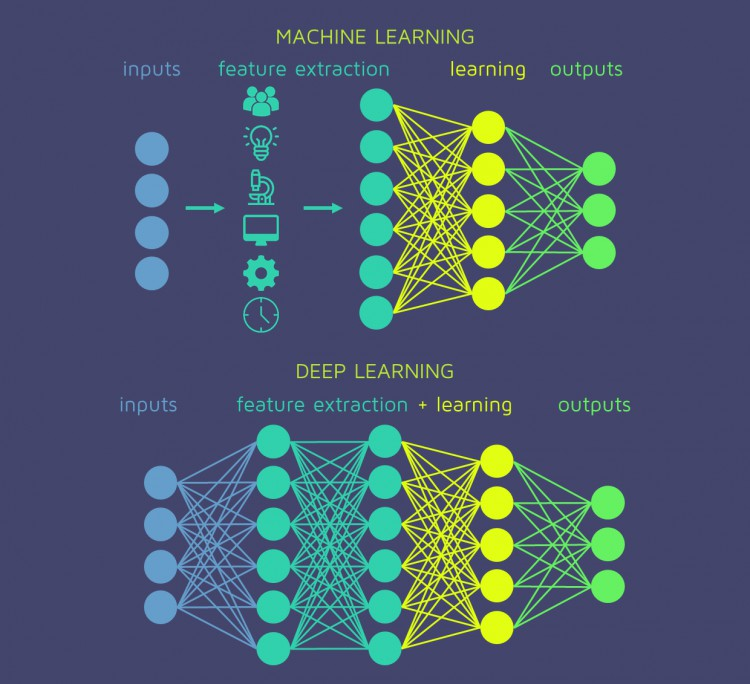

In [ ]:
## importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pycountry

from bokeh.io import output_notebook, show
from bokeh.layouts import column, row
from bokeh.models import LinearAxis
from bokeh.palettes import Spectral11
from bokeh.plotting import figure
from bokeh.models.ranges import Range1d

from plotly import graph_objects as go

output_notebook()

## reading data
df = pd.read_csv("/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv", skiprows=[1])
df_2018 = pd.read_csv("/kaggle/input/kaggle-survey-2018/freeFormResponses.csv", skiprows=[1])

## creating numeric feature for salary
dict_salary = dict({"$0-999": 500, "1,000-1,999": 1500, "2,000-2,999": 2500,
                    "3,000-3,999": 3500, "4,000-4,999": 4500, "5,000-7,499": 6250,
                    "7,500-9,999": 8750, "10,000-14,999": 12500, "15,000-19,999": 17500,
                    "20,000-24,999": 22500, "25,000-29,999": 27500, "30,000-39,999": 35000,
                    "40,000-49,999": 45000, "50,000-59,999": 55000, "60,000-69,999": 65000,
                    "70,000-79,999": 75000, "80,000-89,999": 85000, "90,000-99,999": 95000,
                    "100,000-124,999": 112500, "125,000-149,999": 137500, "150,000-199,999": 175000,
                    "200,000-249,999": 225000, "250,000-299,999": 275000, "300,000-500,000": 400000,
                    "> $500,000": 500000})
df["salary"] = df.Q10.map(dict_salary)

## creating numeric feature for expense
dict_expense = dict({"$0 (USD)": 0, "$1-$99": 50, "$100-$999": 550, "$1000-$9,999": 5500,
                     "$10,000-$99,999": 55000, "> $100,000 ($USD)": 100000})
df["expense"] = df.Q11.map(dict_expense)

## tagging practitioner types
df["practitioner_type"] = "Non-DL Practitioner"
df.loc[~(df.Q24_Part_6.isna() & df.Q24_Part_7.isna() & df.Q24_Part_8.isna() & df.Q24_Part_9.isna() & df.Q24_Part_10.isna()), "practitioner_type"] = "DL Practitioner"
df.loc[(df.Q24_Part_1.isna() & df.Q24_Part_2.isna() & df.Q24_Part_3.isna() & df.Q24_Part_4.isna() & df.Q24_Part_5.isna() &
        df.Q24_Part_6.isna() & df.Q24_Part_7.isna() & df.Q24_Part_8.isna() & df.Q24_Part_9.isna() & df.Q24_Part_10.isna()), "practitioner_type"] = "Unknown"

## splitting dataset by type
df_dl = df[df.practitioner_type == "DL Practitioner"]
df_nondl = df[df.practitioner_type == "Non-DL Practitioner"]
df_dl_nondl = df[df.practitioner_type != "Unknown"]


Let's just quickly check the number of practitioners in the final dataset.

In [ ]:
v = figure(plot_width = 700, plot_height = 300, x_range = np.unique(df.practitioner_type.values), title = "Practitioner Distribution")
v.vbar(x = np.unique(df.practitioner_type.values), top = df.practitioner_type.value_counts().sort_index().values, width = 0.9, color = Spectral11[1], legend_label = "# Participants")
v.legend.location = "top_center"
v.legend.click_policy = "hide"

show(v)


We have about **7.1K DL practitioners** and **5.7K non-DL practitioners** in the survey. The **remaining 6.9K** will not be used.

# 1 Age and Education no bar for Deep Learning!

In [ ]:
v = figure(plot_width = 700, plot_height = 300, x_range = np.unique(df_dl.Q1.values), title = "Age Distribution")
v.vbar(x = np.unique(df_dl.Q1.values), top = df_dl.Q1.value_counts().sort_index().values, width = 0.9, color = Spectral11[1], legend_label = "# DL Practitioners")
v.line(np.unique(df_dl.Q1.values), df_dl.Q1.value_counts().sort_index().values * 100 / df_dl_nondl.Q1.value_counts().sort_index().values, color = Spectral11[10], legend_label = "% DL Practitioners", y_range_name="Percentages")
v.extra_y_ranges = {"Percentages": Range1d(start = 20, end = 80)}
v.add_layout(LinearAxis(y_range_name = "Percentages"), "right")
v.legend.location = "top_right"
v.legend.click_policy = "hide"

show(v)


* We see that about **50%-55%** of practitioners in Data Science work in Deep Learning across all age-groups. So whether you are a college student or a working professional or maybe even retired and looking to get your hands into some new technology and innovation, deep learning is independent of age!
* This resonates with the fact that a lot of successful DL practitioners as well as many top Kagglers are **self-taught** in this field. And something that can be learned through motivation, effort and time has no constraint on age.

In [ ]:
v = figure(plot_width = 700, plot_height = 400, x_range = np.unique(df_dl.Q4.values), title = "Education Distribution")
v.vbar(x = np.unique(df_dl.Q4.values), top = df_dl.Q4.value_counts().sort_index().values, width = 0.9, color = Spectral11[1], legend_label = "# DL Practitioners")
v.line(np.unique(df_dl.Q4.values), df_dl.Q4.value_counts().sort_index().values * 100 / df_dl_nondl.Q4.value_counts().sort_index().values, color = Spectral11[10], legend_label = "% DL Practitioners", y_range_name="Percentages")
v.extra_y_ranges = {"Percentages": Range1d(start = 20, end = 80)}
v.add_layout(LinearAxis(y_range_name = "Percentages"), "right")
v.legend.location = "top_right"
v.legend.click_policy = "hide"
v.xaxis.major_label_orientation = 145

show(v)


* This again clearly shows that there are DL practitioners across varying levels of education (and invariably age too).
* A lot of this could be due to the fact that the modern research in DL is widely available on the internet leading to the **democratization of information**.

> Deep Learning is for anyone and everyone

# 2 Gender Inequality

In [ ]:
v = figure(plot_width = 700, plot_height = 300, x_range = np.unique(df_dl.Q2.values), title = "Gender Distribution")
v.vbar(x = np.unique(df_dl.Q2.values), top = df_dl.Q2.value_counts().sort_index().values, width = 0.9, color = Spectral11[8], legend_label = "# DL Practitioners")
v.line(np.unique(df_dl.Q2.values), df_dl.Q2.value_counts().sort_index().values * 100 / df_dl_nondl.Q2.value_counts().sort_index().values, color = Spectral11[1], legend_label = "% DL Practitioners", y_range_name="Percentages")
v.extra_y_ranges = {"Percentages": Range1d(start = 20, end = 80)}
v.add_layout(LinearAxis(y_range_name = "Percentages"), "right")
v.legend.location = "top_right"
v.legend.click_policy = "hide"

show(v)


* There is a clear gap between the **43% of females** vs **57% of males** in Data Science who work in Deep Learning. But, the number of female respondants to the survey are much lower than men and this percentage may not be very reliable.
* You could also go through the [Geek Girls Rising notebook](https://www.kaggle.com/parulpandey/geek-girls-rising-myth-or-reality) that explores the female responses in detail by [Parul Pandey](https://www.kaggle.com/parulpandey).

> A balanced ensemble of females and males can lead to wonders

# 3 Egypt, Iran and Romania rise as unexpected winners

In [ ]:
## mapping country codes
def get_country_code(country_name):
    """
    Mapping country name to 3-digit country code.
    """
    
    if country_name == "Russia":
        country_name = "Russian Federation"
    if country_name == "South Korea":
        country_name = "Korea, Republic of"
    if country_name == "Hong Kong (S.A.R.)":
        country_name = "Hong Kong"
    if country_name == "Taiwan":
        country_name = "Taiwan, Province of China"    
    if country_name == "Republic of Korea":
        country_name = "Democratic People's Republic of Korea"
    if country_name == "Iran, Islamic Republic of...":
        country_name = "Iran, Islamic Republic of"
    
    country_data = pycountry.countries.get(name=country_name)
    
    if country_data is None:
        country_data = pycountry.countries.get(official_name=country_name)
    
    if country_data is None:
        return np.nan
    return country_data.alpha_3

df_dl_country = pd.DataFrame(df_dl.Q3.value_counts()).reset_index().rename(columns={"index": "country", "Q3": "dl_count"})
df_dl_country["country_code"] = df_dl_country.country.apply(lambda x: get_country_code(x))

f = go.Figure(data=go.Choropleth(
    locations=df_dl_country.country_code,
    z=df_dl_country.dl_count,
    locationmode="ISO-3",
    text=df_dl_country.country,
    colorscale="Blues",
    autocolorscale=False,
    marker_line_width=0.5,
    colorbar_tickprefix="#",
    colorbar_title="# DL Practitioners"
))

f.update_layout(
    title={
        "text": "Global # DL Practitioners",
        "y":0.9,
        "x":0.475,
        "xanchor": "center",
        "yanchor": "top"}
)

f.show()

The top-10 countries with largest number of DL practitioners:

In [ ]:
df_dl_country.sort_values("dl_count", ascending=False).head(10)

* **India, US, Japan, Brazil and China**, the usual suspects, lead the list of DL practitioners. It is very intuitive and expected due to the population of the countries and corresponding number of active users on Kaggle.

Instead, let's look at the % of DL practitioners within each country among those in Data Science. The results are very different.

In [ ]:
df_dl_nondl_country = pd.DataFrame(df_dl_nondl.Q3.value_counts()).reset_index().rename(columns={"index": "country", "Q3": "dl_nondl_count"})
df_dl_nondl_country["country_code"] = df_dl_nondl_country.country.apply(lambda x: get_country_code(x))
df_dl_nondl_country = df_dl_nondl_country.merge(df_dl_country[["country_code", "dl_count"]], how="left", on="country_code")
df_dl_nondl_country["dl_percentage"] = round(df_dl_nondl_country.dl_count * 100 / df_dl_nondl_country.dl_nondl_count)

f = go.Figure(data=go.Choropleth(
    locations=df_dl_nondl_country.country_code,
    z=df_dl_nondl_country.dl_percentage,
    locationmode="ISO-3",
    text=df_dl_nondl_country.country,
    colorscale="Blues",
    autocolorscale=False,
    marker_line_width=0.5,
    colorbar_ticksuffix="%",
    colorbar_title="% DL Practitioners"
))

f.update_layout(
    title={
        "text": "Global % DL Practitioners",
        "y":0.9,
        "x":0.475,
        "xanchor": "center",
        "yanchor": "top"}
)

f.show()

The top-10 countries with largest proportion of DL practitioners among those in Data Science:

In [ ]:
df_dl_nondl_country.sort_values("dl_percentage", ascending=False).head(10)

* **Egypt! 🇪🇬 Iran! 🇮🇷 Romania! 🇷🇴** A large proportion of practitioners in Data Science in these countries are working in Deep Learning. Looking at the top-10 list, there are many unexpected names. It is wonderful to see DL being adopted in so many countries across continents.
* If we consider at least 100 respondants to Q24 from a country to be reliable enough data, we have **Taiwan 🇹🇼, China 🇨🇳 and Turkey 🇹🇷** who have the largest proportion of DL practitioners.
* Just for comparison, India has 56% and US has 48% and they are much lower in the list.

> You might want to relocate to Egypt if you are a DL enthusiast.

# 4 Research and Engineering are the recipes for Deep Learning

In [ ]:
df_dl_role = pd.DataFrame(df_dl.Q5.value_counts()).reset_index().rename(columns={"index": "Role", "Q5": "dl_count"})
df_dl_nondl_role = pd.DataFrame(df_dl_nondl.Q5.value_counts()).reset_index().rename(columns={"index": "Role", "Q5": "dl_nondl_count"})

df_dl_role = df_dl_role.merge(df_dl_nondl_role)
df_dl_role["dl_percentage"] = df_dl_role.dl_count * 100 / df_dl_role.dl_nondl_count
df_dl_role.sort_values("dl_percentage", ascending=False, inplace=True)

f = figure(x_range=df_dl_role.Role.values, plot_width=700, plot_height=300, title="Role Distribution")
f.vbar(x=df_dl_role.Role.values, top=df_dl_role.dl_count.values, width=0.9, color=Spectral11[9], legend_label="# DL Practitioners")
f.line(df_dl_role.Role.values, df_dl_role.dl_percentage.values, color=Spectral11[1], legend_label="% DL Practitioners", y_range_name="Percentages")
f.extra_y_ranges = {"Percentages": Range1d(start=20, end=80)}
f.add_layout(LinearAxis(y_range_name="Percentages"), "right")
f.legend.location="top_right"
f.legend.click_policy="hide"
f.xaxis.major_label_orientation=145
show(f)

* Deep Learning requires a lot of research and implementation and the plot above is a great confirmation of the same. People in roles of **Research Scientist, Software Engineer and Data Scientist** are almost twice as likely **(>60%)** to be working in DL compared to those in roles of **Business Analyst, Statistician and Data Analyst (~35%)**.
* In today's world, most DL projects in the industry require skills of research as well engineering together for success. Defining, transforming and pipelining a data science problem into a deep learning framework is as important and crucial as implementing, productionizing and solutioning of the problem. They go hand-in-hand like two sides of a coin.

> Deep Learning has to be learnt and done hands-on

# 5 Income and Expenses don't change

In [ ]:
import seaborn as sns
f = sns.FacetGrid(df_dl_nondl, col="practitioner_type")
f.map(plt.hist, "salary")
f.add_legend()
plt.show()

In [ ]:
bp = sns.boxplot(x="practitioner_type", y="salary", data=df_dl_nondl, palette="Set2").set_title("Salary Distribution")

In [ ]:
import seaborn as sns
f = sns.FacetGrid(df_dl_nondl, col="practitioner_type")
f.map(plt.hist, "expense")
f.add_legend()
plt.show()

In [ ]:
bp = sns.boxplot(x="practitioner_type", y="expense", data=df_dl_nondl, palette="Set3").set_title("Expense Distribution")

* The salary distribution as well as the statistical measures like mean, median, quartiles and variance are almost identical between DL practitioners and non-DL practitioners.
* The expenses made for work has a very similar distribution as well.

> Deep Learning is for the passionate

# 6 Blogs, Coursera and YouTube are a goldmine of information

In [ ]:
media_list = {
    "Twitter": sum(~df_dl.Q12_Part_1.isna()) * 100 / df_dl.shape[0],
    "HackerNews": sum(~df_dl.Q12_Part_2.isna()) * 100 / df_dl.shape[0],
    "Reddit": sum(~df_dl.Q12_Part_3.isna()) * 100 / df_dl.shape[0],
    "Kaggle": sum(~df_dl.Q12_Part_4.isna()) * 100 / df_dl.shape[0],
    "Forums": sum(~df_dl.Q12_Part_5.isna()) * 100 / df_dl.shape[0],
    "YouTube": sum(~df_dl.Q12_Part_6.isna()) * 100 / df_dl.shape[0],
    "Podcasts": sum(~df_dl.Q12_Part_7.isna()) * 100 / df_dl.shape[0],
    "Blogs": sum(~df_dl.Q12_Part_8.isna()) * 100 / df_dl.shape[0],
    "Journals": sum(~df_dl.Q12_Part_9.isna()) * 100 / df_dl.shape[0],
    "Slack": sum(~df_dl.Q12_Part_10.isna()) * 100 / df_dl.shape[0],
    "None": sum(~df_dl.Q12_Part_11.isna()) * 100 / df_dl.shape[0],
    "Other": sum(~df_dl.Q12_Part_12.isna()) * 100 / df_dl.shape[0]
}

df_dl_media = pd.DataFrame.from_dict(media_list, orient="index", columns=["media_percentage"]).reset_index().rename(columns={"index": "media"})
df_dl_media.sort_values("media_percentage", ascending=False, inplace=True)

platform_list = {
    "Udacity": sum(~df_dl.Q13_Part_1.isna()) * 100 / df_dl.shape[0],
    "Coursera": sum(~df_dl.Q13_Part_2.isna()) * 100 / df_dl.shape[0],
    "edX": sum(~df_dl.Q13_Part_3.isna()) * 100 / df_dl.shape[0],
    "DataCamp": sum(~df_dl.Q13_Part_4.isna()) * 100 / df_dl.shape[0],
    "DataQuest": sum(~df_dl.Q13_Part_5.isna()) * 100 / df_dl.shape[0],
    "Kaggle": sum(~df_dl.Q13_Part_6.isna()) * 100 / df_dl.shape[0],
    "Fast.ai": sum(~df_dl.Q13_Part_7.isna()) * 100 / df_dl.shape[0],
    "Udemy": sum(~df_dl.Q13_Part_8.isna()) * 100 / df_dl.shape[0],
    "LinkedIn": sum(~df_dl.Q13_Part_9.isna()) * 100 / df_dl.shape[0],
    "University": sum(~df_dl.Q13_Part_10.isna()) * 100 / df_dl.shape[0],
    "None": sum(~df_dl.Q13_Part_11.isna()) * 100 / df_dl.shape[0],
    "Other": sum(~df_dl.Q13_Part_12.isna()) * 100 / df_dl.shape[0]
}

df_dl_platform = pd.DataFrame.from_dict(platform_list, orient="index", columns=["platform_percentage"]).reset_index().rename(columns={"index": "platform"})
df_dl_platform.sort_values("platform_percentage", ascending=False, inplace=True)

f1 = figure(x_range=df_dl_media.media, plot_width=700, plot_height=400, title="Media Distribution")
f1.vbar(x=df_dl_media.media, top=df_dl_media.media_percentage, width=0.9, color=Spectral11[6], legend_label="% Media Usage")
f1.legend.location="top_right"
f1.legend.click_policy="hide"
f1.xaxis.major_label_orientation=145

f2 = figure(x_range=df_dl_platform.platform, plot_width=700, plot_height=400, title="Platform Distribution")
f2.vbar(x=df_dl_platform.platform, top=df_dl_platform.platform_percentage, width=0.9, color=Spectral11[6], legend_label="% Platform Usage")
f2.legend.location="top_right"
f2.legend.click_policy="hide"
f2.xaxis.major_label_orientation=145

show(column(f1, f2))

* Let's ignore the Kaggle bars since these are already biased with Kaggle users. **~65% of DL practitioners read blogs, followed by ~60% who do Coursera courses**. And why not? Both are extremely rich sources of information and a lot of the latest developments in DL are shared and discussed here.
* [Andrew Ng](https://en.wikipedia.org/wiki/Andrew_Ng), one of the biggest figures in AI co-founded [Coursera](https://www.coursera.org/) and as of 2019, the two most popular courses on the platform is, without surprise, [Machine Learning](https://www.coursera.org/learn/machine-learning) and [Deep Learning](https://www.coursera.org/learn/neural-networks-deep-learning). Well, of course everyone is going to be on Coursera!
* It is probably one of the first set of material that any DL practitioner should study.

> Knowledge is power

# 7 The deadly combo of Jupyter + Colab + Python

In [ ]:
ide_list = {
    "Jupyter": sum(~df_dl.Q16_Part_1.isna()) * 100 / df_dl.shape[0],
    "RStudio": sum(~df_dl.Q16_Part_2.isna()) * 100 / df_dl.shape[0],
    "PyCharm": sum(~df_dl.Q16_Part_3.isna()) * 100 / df_dl.shape[0],
    "Atom": sum(~df_dl.Q16_Part_4.isna()) * 100 / df_dl.shape[0],
    "MATLAB": sum(~df_dl.Q16_Part_5.isna()) * 100 / df_dl.shape[0],
    "VisualStudio": sum(~df_dl.Q16_Part_6.isna()) * 100 / df_dl.shape[0],
    "Spyder": sum(~df_dl.Q16_Part_7.isna()) * 100 / df_dl.shape[0],
    "Vim": sum(~df_dl.Q16_Part_8.isna()) * 100 / df_dl.shape[0],
    "Notepad++": sum(~df_dl.Q16_Part_9.isna()) * 100 / df_dl.shape[0],
    "SublimeText": sum(~df_dl.Q16_Part_10.isna()) * 100 / df_dl.shape[0],
    "None": sum(~df_dl.Q16_Part_11.isna()) * 100 / df_dl.shape[0],
    "Other": sum(~df_dl.Q16_Part_12.isna()) * 100 / df_dl.shape[0]
}

df_dl_ide = pd.DataFrame.from_dict(ide_list, orient="index", columns=["ide_percentage"]).reset_index().rename(columns={"index": "ide"})
df_dl_ide.sort_values("ide_percentage", ascending=False, inplace=True)

notebook_list = {
    "KaggleNotebooks": sum(~df_dl.Q17_Part_1.isna()) * 100 / df_dl.shape[0],
    "GoogleColab": sum(~df_dl.Q17_Part_2.isna()) * 100 / df_dl.shape[0],
    "MicrosoftAzureNotebooks": sum(~df_dl.Q17_Part_3.isna()) * 100 / df_dl.shape[0],
    "GoogleCloudNotebooks": sum(~df_dl.Q17_Part_4.isna()) * 100 / df_dl.shape[0],
    "Paperspace/Gradient": sum(~df_dl.Q17_Part_5.isna()) * 100 / df_dl.shape[0],
    "FloydHub": sum(~df_dl.Q17_Part_6.isna()) * 100 / df_dl.shape[0],
    "Binder/JupyterHub": sum(~df_dl.Q17_Part_7.isna()) * 100 / df_dl.shape[0],
    "IBMWatsonStudio": sum(~df_dl.Q17_Part_8.isna()) * 100 / df_dl.shape[0],
    "CodeOcean": sum(~df_dl.Q17_Part_9.isna()) * 100 / df_dl.shape[0],
    "AWSNotebooks": sum(~df_dl.Q17_Part_10.isna()) * 100 / df_dl.shape[0],
    "None": sum(~df_dl.Q17_Part_11.isna()) * 100 / df_dl.shape[0],
    "Other": sum(~df_dl.Q17_Part_12.isna()) * 100 / df_dl.shape[0]
}

df_dl_notebook = pd.DataFrame.from_dict(notebook_list, orient="index", columns=["notebook_percentage"]).reset_index().rename(columns={"index": "notebook"})
df_dl_notebook.sort_values("notebook_percentage", ascending=False, inplace=True)

language_list = {
    "Python": sum(~df_dl.Q18_Part_1.isna()) * 100 / df_dl.shape[0],
    "R": sum(~df_dl.Q18_Part_2.isna()) * 100 / df_dl.shape[0],
    "SQL": sum(~df_dl.Q18_Part_3.isna()) * 100 / df_dl.shape[0],
    "C": sum(~df_dl.Q18_Part_4.isna()) * 100 / df_dl.shape[0],
    "C++": sum(~df_dl.Q18_Part_5.isna()) * 100 / df_dl.shape[0],
    "Java": sum(~df_dl.Q18_Part_6.isna()) * 100 / df_dl.shape[0],
    "Javascript": sum(~df_dl.Q18_Part_7.isna()) * 100 / df_dl.shape[0],
    "TypeScript": sum(~df_dl.Q18_Part_8.isna()) * 100 / df_dl.shape[0],
    "Bash": sum(~df_dl.Q18_Part_9.isna()) * 100 / df_dl.shape[0],
    "MATLAB": sum(~df_dl.Q18_Part_10.isna()) * 100 / df_dl.shape[0],
    "None": sum(~df_dl.Q18_Part_11.isna()) * 100 / df_dl.shape[0],
    "Other": sum(~df_dl.Q18_Part_12.isna()) * 100 / df_dl.shape[0]
}

df_dl_language = pd.DataFrame.from_dict(language_list, orient="index", columns=["language_percentage"]).reset_index().rename(columns={"index": "language"})
df_dl_language.sort_values("language_percentage", ascending=False, inplace=True)

f1 = figure(x_range=df_dl_ide.ide, plot_width=700, plot_height=400, title="IDE Distribution")
f1.vbar(x=df_dl_ide.ide, top=df_dl_ide.ide_percentage, width=0.9, color=Spectral11[3], legend_label="% IDE Usage")
f1.legend.location="top_right"
f1.legend.click_policy="hide"
f1.xaxis.major_label_orientation=145

f2 = figure(x_range=df_dl_notebook.notebook, plot_width=700, plot_height=400, title="Notebook Distribution")
f2.vbar(x=df_dl_notebook.notebook, top=df_dl_notebook.notebook_percentage, width=0.9, color=Spectral11[3], legend_label="% Notebook Usage")
f2.legend.location="top_right"
f2.legend.click_policy="hide"
f2.xaxis.major_label_orientation=145

f3 = figure(x_range=df_dl_language.language, plot_width=700, plot_height=400, title="Language Distribution")
f3.vbar(x=df_dl_language.language, top=df_dl_language.language_percentage, width=0.9, color=Spectral11[3], legend_label="% Language Usage")
f3.legend.location="top_right"
f3.legend.click_policy="hide"
f3.xaxis.major_label_orientation=145

show(column(f1, f2, f3))

* The numbers say it all. A whopping **>95% of DL practitioners use Python**, and combined with **>80% of Jupyter** and **>40% of Colab**, these easily form the most popular and convenient set of tools available today.
* Almost every popular library in DL is based in Python so the 5% folks who are not Python users might be missing the bus.

> Using the latest and best can give an upper edge

# 8 GPU usage on the rise

In [ ]:
hardware_list = {
    "CPUs": sum(~df_dl.Q21_Part_1.isna()) * 100 / df_dl.shape[0],
    "GPUs": sum(~df_dl.Q21_Part_2.isna()) * 100 / df_dl.shape[0],
    "TPUs": sum(~df_dl.Q21_Part_3.isna()) * 100 / df_dl.shape[0],
    "None": sum(~df_dl.Q21_Part_4.isna()) * 100 / df_dl.shape[0],
    "Other": sum(~df_dl.Q21_Part_5.isna()) * 100 / df_dl.shape[0]
}

df_dl_hardware = pd.DataFrame.from_dict(hardware_list, orient="index", columns=["hardware_percentage"]).reset_index().rename(columns={"index": "hardware"})
df_dl_hardware.sort_values("hardware_percentage", ascending=False, inplace=True)

model_list = {
    "DenseNN": sum(~df_dl.Q24_Part_6.isna()) * 100 / df_dl.shape[0],
    "CNN": sum(~df_dl.Q24_Part_7.isna()) * 100 / df_dl.shape[0],
    "GAN": sum(~df_dl.Q24_Part_8.isna()) * 100 / df_dl.shape[0],
    "RNN": sum(~df_dl.Q24_Part_9.isna()) * 100 / df_dl.shape[0],
    "TransformerNetworks": sum(~df_dl.Q24_Part_10.isna()) * 100 / df_dl.shape[0],
    "None": sum(~df_dl.Q24_Part_11.isna()) * 100 / df_dl.shape[0],
    "Other": sum(~df_dl.Q24_Part_12.isna()) * 100 / df_dl.shape[0]
}

df_dl_model = pd.DataFrame.from_dict(model_list, orient="index", columns=["model_percentage"]).reset_index().rename(columns={"index": "model"})
df_dl_model.sort_values("model_percentage", ascending=False, inplace=True)

tool_list = {
    "AutoAugmentation": sum(~df_dl.Q25_Part_1.isna()) * 100 / df_dl.shape[0],
    "AutoFeatureSelection": sum(~df_dl.Q25_Part_2.isna()) * 100 / df_dl.shape[0],
    "AutoModelSelection": sum(~df_dl.Q25_Part_3.isna()) * 100 / df_dl.shape[0],
    "AutoModelArchitectureSearch": sum(~df_dl.Q25_Part_4.isna()) * 100 / df_dl.shape[0],
    "AutoHyperparameterTuning": sum(~df_dl.Q25_Part_5.isna()) * 100 / df_dl.shape[0],
    "AutoML": sum(~df_dl.Q25_Part_6.isna()) * 100 / df_dl.shape[0],
    "None": sum(~df_dl.Q25_Part_7.isna()) * 100 / df_dl.shape[0],
    "Other": sum(~df_dl.Q25_Part_8.isna()) * 100 / df_dl.shape[0]
}

df_dl_tool = pd.DataFrame.from_dict(tool_list, orient="index", columns=["tool_percentage"]).reset_index().rename(columns={"index": "tool"})
df_dl_tool.sort_values("tool_percentage", ascending=False, inplace=True)

f1 = figure(x_range=df_dl_hardware.hardware, plot_width=700, plot_height=400, title="Hardware Distribution")
f1.vbar(x=df_dl_hardware.hardware, top=df_dl_hardware.hardware_percentage, width=0.9, color=Spectral11[0], legend_label="% Hardware Usage")
f1.legend.location="top_right"
f1.legend.click_policy="hide"
f1.xaxis.major_label_orientation=145

f2 = figure(x_range=df_dl_model.model, plot_width=700, plot_height=400, title="Model Distribution")
f2.vbar(x=df_dl_model.model, top=df_dl_model.model_percentage, width=0.9, color=Spectral11[0], legend_label="% Model Usage")
f2.legend.location="top_right"
f2.legend.click_policy="hide"
f2.xaxis.major_label_orientation=145

f3 = figure(x_range=df_dl_tool.tool, plot_width=700, plot_height=400, title="Tool Distribution")
f3.vbar(x=df_dl_tool.tool, top=df_dl_tool.tool_percentage, width=0.9, color=Spectral11[0], legend_label="% Tool Usage")
f3.legend.location="top_right"
f3.legend.click_policy="hide"
f3.xaxis.major_label_orientation=145

show(column(f1, f2, f3))

* The GPU usage is close to the CPU usage due to the fact that running DL models can require a **lot of computing power** and GPUs help in scaling horizontally.
* **CNN is the most popular model** used by DL practitioners.
* AutoML techniques are widely used for structured data without DL models. They are not yet mature to deal with data that is unstructured and to automatically work with DL methods and architectures.

> Upgrading to GPU is worth it

# 9 CNN breakthrough in Image Classification

In [ ]:
cv_list = {
    "Regular Methods": sum(~df_dl.Q26_Part_1.isna()) * 100 / df_dl.shape[0],
    "Image Segmentation": sum(~df_dl.Q26_Part_2.isna()) * 100 / df_dl.shape[0],
    "Object Detection": sum(~df_dl.Q26_Part_3.isna()) * 100 / df_dl.shape[0],
    "Image Classification": sum(~df_dl.Q26_Part_4.isna()) * 100 / df_dl.shape[0],
    "Image Generation": sum(~df_dl.Q26_Part_5.isna()) * 100 / df_dl.shape[0],
    "None": sum(~df_dl.Q26_Part_6.isna()) * 100 / df_dl.shape[0],
    "Other": sum(~df_dl.Q26_Part_7.isna()) * 100 / df_dl.shape[0]
}

df_dl_cv = pd.DataFrame.from_dict(cv_list, orient="index", columns=["cv_percentage"]).reset_index().rename(columns={"index": "cv"})
df_dl_cv.sort_values("cv_percentage", ascending=False, inplace=True)

f = figure(x_range=df_dl_cv.cv, plot_width=700, plot_height=400, title="Computer Vision techniques Distribution")
f.vbar(x=df_dl_cv.cv, top=df_dl_cv.cv_percentage, width=0.9, color=Spectral11[8], legend_label="% Computer Vision techniques Usage")
f.legend.location="top_right"
f.legend.click_policy="hide"
f.xaxis.major_label_orientation=145

show(f)

* One of the biggest use-cases of DL models in the industry is on image/video data. With the ability to process raw pixel data of images to build solutions that are capable of matching human performance and even beating it in some cases, **Image Classification** is making breakthroughs in many ways.
* Earlier we saw CNN as the most popular algorithm being used and not surprisingly, **CNNs** are also the most frequent method used for image classification problems.
* **Image Segmentation** and **Object Detection** are slowly but surely catching up. They are a bit more complex in nature, but the annual [Open Images](https://opensource.google/projects/open-images-dataset) dataset and competition on Kaggle is helping its development.

> DL models are improving with every passing day

# 10 A new era of NLP is coming

In [ ]:
nlp_list = {
    "Word Embeddings": sum(~df_dl.Q27_Part_1.isna()) * 100 / df_dl.shape[0],
    "Sequence Models": sum(~df_dl.Q27_Part_2.isna()) * 100 / df_dl.shape[0],
    "Contextualized Embeddings": sum(~df_dl.Q27_Part_3.isna()) * 100 / df_dl.shape[0],
    "Language Models": sum(~df_dl.Q27_Part_4.isna()) * 100 / df_dl.shape[0],
    "None": sum(~df_dl.Q27_Part_5.isna()) * 100 / df_dl.shape[0],
    "Other": sum(~df_dl.Q27_Part_6.isna()) * 100 / df_dl.shape[0]
}

df_dl_nlp = pd.DataFrame.from_dict(nlp_list, orient="index", columns=["nlp_percentage"]).reset_index().rename(columns={"index": "nlp"})
df_dl_nlp.sort_values("nlp_percentage", ascending=False, inplace=True)

f = figure(x_range=df_dl_nlp.nlp, plot_width=700, plot_height=400, title="NLP techniques Distribution")
f.vbar(x=df_dl_nlp.nlp, top=df_dl_nlp.nlp_percentage, width=0.9, color=Spectral11[8], legend_label="% NLP techniques Usage")
f.legend.location="top_right"
f.legend.click_policy="hide"
f.xaxis.major_label_orientation=145

show(f)

* Word Embeddings like **TFIDF, Word2Vec and Glove** were the go-to approaches when working on NLP problems and are still being used. But a lot has changed in recent years.
* Language models like **BERT, XLNET and GPT-2** are models that are performing exceptionally well on various problems using textual data. These are new and it's adoption is expected to increase in the coming years.
* One of the drawbacks of the newer language models are it's scoring latency which might be a reason it may not easily be adopted in real-time production systems. This could improve in the future too.

> NLP models are understanding human languages better

# Overall Summary
We've seen a variety of outputs for Deep Learning practitioners through slicing/dicing of the data with numerous comparisons, results, questions and probable reasonings. Here's a summary of the key insights:

* **Deep Learning is everywhere:** Deep Learning is being practised across ages, education levels and geographies. Egypt, Iran and Romania have the highest proportion of DL practitioners among those building Data Science models.
* **Male Dominance:** Females have lower participation and prominence than men. Having more data to support or accept this is required.
* **Research + Engineering ensemble:** Research and Engineering are strongly correlated to working in the DL space. These areas of expertise are the essential components for building successing solutions in the industry.
* **Passion not Money:** Salary and Expenditure is consistent irrespective of the type of work.
* **Online Content:** Blogs, Coursera and YouTube are the top-3 sources that are used by DL practitioners. A lot of the latest content is available at these online sources and most for free.
* **Python all the way:** Python is and seems to be the favourite language of DL practitioners. And it doesn't seem to be changing anytime soon.
* **Computing power:** GPUs are becoming a dire need for running DL models. TPUs haven't yet reached the scale of availability and adoption compared to GPUs. It will take time to establish a set of libraries and a community that can help run many of the DL workflows.
* **Unstructured Victories:** CNNs made a big breakthrough in image processing and since then DL has been widely used to solve computer vision problems. New pre-trained language models like BERT that use transformer architecture are making waves recently due to their improved performance over traditional approaches. These are expected to be adopted more especially if it's scoring latency can be enhanced.